# HW2 Astr 518

# Nicolas Garavito

In this notebook I'll through the HW exercises, both showing the code and the results.

In [1]:
%pylab inline
from matplotlib import cm

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = np.loadtxt('../HW2.txt')
X = data[:,1]
Y = data[:,2]
sigma_X = data[:,4]
sigma_Y = data[:,3]
rho_xy = data[:,5]


In [3]:
font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)


def scatter_plot(x, y, m,b,sigmax=False, sigmay=False, q=False):
    x_plot = np.linspace(0, 300)
    figsize(6,5)
    errorbar(x, y, xerr=sigmax, yerr=sigmay, c='k', fmt='o')
    if q:
        y_plot = q*x_plot**2.0 + x_plot*m + b
        plot(x_plot, y_plot, c='k', alpha=0.7, label='$ y = ({}) x^2 + ({})x + {}$'.format(q, m, b))
    else:
        y_plot = x_plot * m +b
        plot(x_plot, y_plot, c='k', alpha=0.7, label='$ y = ({})x +{}$'.format(m, b))
    
    legend(loc='best', fontsize=15)
    xlabel('$x$', fontsize=25)
    ylabel('$y$', fontsize=25)
    

# 1

Bellow is the function (linear_fit1) to compute the values of $m$ and $b$ following Hogg 2010 Eq.5

In [4]:
def linear_fit1(x, y, sigmay):
    """
    Function to make the basic linear fit! Following Hogg (2010)
    Eq. 5. 
    
    """
    A = np.ones((len(y), 2))
    A[:,1] = x    
    C = np.zeros((len(y), len(y)))
    for i in range(len(y)):
        C[i][i] = sigmay[i]**2.0
    C_inv = linalg.inv(C)
    
    cov = dot(A.T,dot(C_inv,A))
    cov_inv = linalg.inv(cov)
    mat2 = dot(A.T,dot(C_inv,y))
    
    b,m = dot(cov_inv, mat2)
    
    print('b =', b)
    print('m =', m)
    print('sigma_b =',np.sqrt(cov_inv[0,0]))
    print('sigma_m =',np.sqrt(cov_inv[1,1]))

# 1a.


Ignore the first four points in the data table.  Use standard linear algebra to obtain a 
best fit line ($y=mx+b$) to the data, using $\sigma_y$, and ignoring $\sigma_x$ and $\rho_xy$.  
Report the best fit (given by the program) and uncertainty (you will need to modify the 
program for these) for $m$ and $b$.  Create a plot.



In [5]:
linear_fit1(X[4:], Y[4:], sigma_Y[4:])

b = 34.0477277575
m = 2.23992083163
sigma_b = 18.2461667493
sigma_m = 0.107780476541


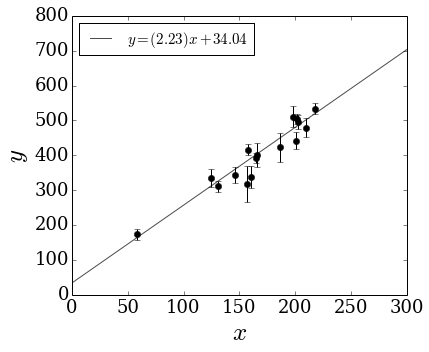

In [6]:
scatter_plot(X[4:], Y[4:], sigmay=sigma_Y[4:], m=2.23, b=34.04)


# 1b.

Include the first four points and repeat the exercise, including the plot. Compare the 
uncertainties on the fit parameters.  Discuss the differences and accuracy of the 
derived parameters and uncertainties.

In [7]:
linear_fit1(X, Y, sigma_Y)

b = 213.273491976
m = 1.07674752417
sigma_b = 14.3940331072
sigma_m = 0.0774067831658


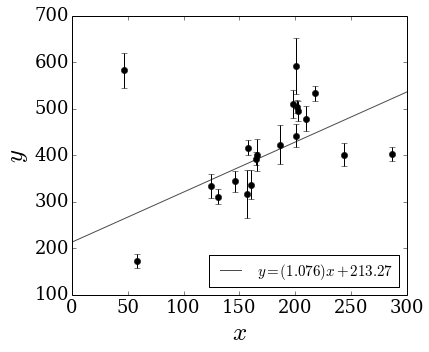

In [8]:
scatter_plot(X, Y, sigmay=sigma_Y, m=1.076, b=213.27)

**Discussion:** The first thing to notest is that I get very different values for $b$, $m$, $\sigma_b$
and $\sigma_m$ in both cases. This 


# 1c.

Generalize the method above to include a quadratic term and redo 1.a. with this fit.  
You will need to add a column to the A matrix to do this

In [9]:
def linear_fit2(x, y, sigmay):
    A = np.ones((len(y), 3))
    A[:,1] = x    
    A[:,2] = x**2.0
    C = np.zeros((len(y), len(y)))
    for i in range(len(y)):
        C[i][i] = sigmay[i]**2.0
    C_inv = linalg.inv(C)
    
    cov = dot(A.T,dot(C_inv,A))
    cov_inv = linalg.inv(cov)
    mat2 = dot(A.T,dot(C_inv,y))
    
    b,m,q = dot(cov_inv, mat2)
    
    print('q =', q)
    print('b =', b)
    print('m =', m)
    print('sigma_q = ',np.sqrt(cov_inv[0,0]))
    print('sigma_b = ',np.sqrt(cov_inv[1,1]))
    print('sigma_m = ',np.sqrt(cov_inv[2,2]))


In [10]:
linear_fit2(X[4:], Y[4:], sigma_Y[4:])

q = 0.00229888840812
b = 72.8946264717
m = 1.59605045227
sigma_q =  38.9115551946
sigma_b =  0.579747912517
sigma_m =  0.00203385870874


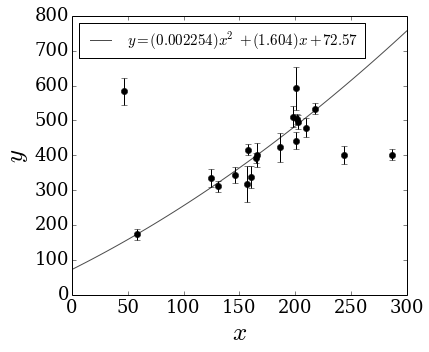

In [11]:
scatter_plot(X, Y, sigmay=sigma_Y, m=1.604, b=72.57, q=0.002254)

# 2 Goodness of Fit, and using chi-squared.


# 2.a

Calculate the value of chi-squared for 1.a and 1.b.  Discuss what the value of chi-
squared tells you about the goodness of fit in each case

In [12]:
def xi2(x, y, m, b, sigmay):
    xi_2 = np.sum((y-(m*x)-b)**2.0/(sigmay**2.0))
    return xi_2

#def ML(x, y, m , b, sigmay):
    


In [13]:
xi2(X[4:], Y[4:], 2.23253621695, 34.8459413134, sigma_Y[4:])

18.691814000540401

The value of chi-squared for $1a$ is:
    
$\chi^2 = 18.58$

In [14]:
xi2(X, Y, 1.07674752417, 213.273491976, sigma_Y)

289.96372278199942

The value of chi-squared for $1b$ is:
    
$\chi^2 = 289.96$

**Discussion:**This two values basically tell me that the when we exclude the first
$4$ values the fit to the line is much better. This is because this first 4 points
are outliers of the data.

# 2b

Estimate the standard uncertainty for the $1.a$ and $1.b$ data set by replacing the 
individual $\sigma_y$ values with a common value, $S$, and calculating the minimum 
value for $S$ that allows a “good” chi-squared value. 

In [75]:
S = np.linspace(0, 100, 1000)
chi2_array = np.zeros(len(S))
for i in range(len(S)):
    chi2_array[i] = xi2(X[5:], Y[5:], 2.23253621695, 34.8459413134, S[i])

index_min_chi2 = np.where(chi2_array >= 18.)[0]
print('good S = ', np.sqrt(S[index_min_chi2[-1]]))

good S =  5.30359577345


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


A good value of $\sigma_y$ is $5.30$ to get a $\chi^2 <18$

# 2c

Create a contour or color image of the maximum likelihood for 1.a and 1b, that is:

\begin{equation}
\mathcal{L} = \prod_i \dfrac{1}{\sqrt{2\pi \sigma_y^2}} e^{-(y_i-mx_i-b)^2/2\sigma_y^2}
\end{equation}

In [78]:
N_grid = 100
M = linspace(0, 3.2, N_grid)
B = linspace(-100, 300, N_grid)
xi2_min = np.zeros((N_grid,N_grid))
xi2_min2 = np.zeros((N_grid,N_grid))

for m in range(N_grid):
    for b in range(N_grid):
        xi2_min[b][m] = xi2(X[4:], Y[4:], M[m], B[b], sigma_Y[4:])
        xi2_min2[b][m] = xi2(X, Y, M[m], B[b], sigma_Y)

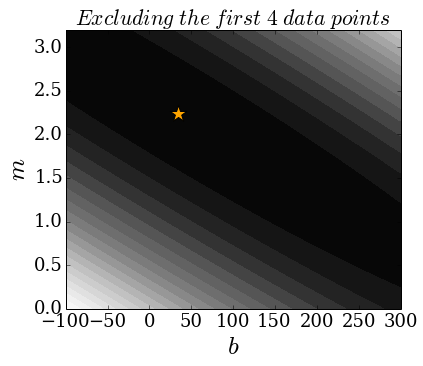

In [82]:
figsize(6,5)
contourf(B, M, xi2_min.T, 20, cmap=cm.Greys_r)
scatter(34.8459413134,2.23253621695, c='orange', marker='*', s=300)
xlim(-100, 300)
ylim(0, 3.2)
xlabel('$b$', fontsize=25)
ylabel('$m$', fontsize=25)
title('$Excluding\ the\ first\ 4\ data\ points$')

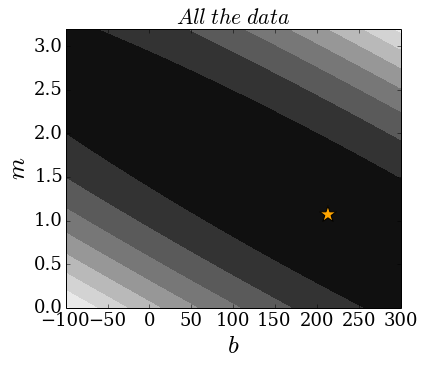

In [83]:
figsize(6,5)
contourf(B, M, xi2_min2.T, 10, cmap=cm.Greys_r)
scatter(213.3,1.07, c='orange', marker='*', s=300)
xlim(-100, 300)
ylim(0, 3.2)
xlabel('$b$', fontsize=25)
ylabel('$m$', fontsize=25)
title('$All\ the\ data$')

# 3 Bayesian Analysis

a.
Assume that each point has a probability, $P_b$, that it is “bad”, and these bad points 
have a mean value $Y_b$, and variance, $V_b$.  This gives us five parameters, but we 
are really only interested in two: $m$ and $b$.  The new maximum likelihood is

“Marginalize” the parameters $P_b$, $Y_b$, and, $V_b$ by the following prescription:

1. For each value of $m$ and $b$, sum the  ML for:

- $P_b$ from 0 to 1 (in increments of 0.1).

- $V_b$ from 0 to  ~4000 ( in increments of 400)

- $Y_b$ from 0 to 700 (in increments of 70)

2. Find the maximum for $m$ and $b$ in the two-dimensional grid of $m$ and $b$ values 
calculated.

iii. Refine your grid if necessary.
Note that this calculation can take long periods of time. Define coarse grids to start with, 
to test, and refine the grid, rather than trying to  complete it all with one pass.



In [84]:
def ML2(x, y, sigmay, m, b, V, P, Yb):
    exp1 = (1-P)/(np.sqrt(2.*np.pi*sigmay**2.0))*np.exp(-(y-(m*x)-b)**2.0/(2.0*sigmay**2.0))
    exp2 = P/(np.sqrt(2.0*np.pi*(sigmay**2.0+V)))*np.exp(-(y-Yb)**2.0/(2.0*(sigmay**2.0+V)))
    return np.prod(exp1+exp2)


In [39]:
def ML_errors(N_grid, N_grid2, x, y, sigmay):
    M = linspace(1, 3.2, N_grid)
    B = linspace(-100, 100, N_grid)

    Pb = np.linspace(0, 1, N_grid2)
    Vb = np.linspace(0, 4000, N_grid2)
    Yb = np.linspace(0, 700, N_grid2)

    ML = np.zeros((N_grid, N_grid))

    for m in range(len(M)):
        for b in range(len(B)):
            ml_med = []
            for pb in range(len(Pb)):
                for vb in range(len(Vb)):
                    for yb in range(len(Yb)):
                        ml_med.append(ML2(x,y, sigmay, M[m], B[b], Vb[vb], Pb[pb], Yb[yb]))
            ML[m][b] = np.sum(ml_med)
    index_max = np.where(ML.T==np.max(ML.T))
    best_B = B[index_max[0]]
    best_M = M[index_max[1]]

    return ML, best_B, best_M

In [31]:
ML_test, b_b, M_b =ML_errors(40, 11, X[4:], Y[4:], sigma_Y[4:])

In [33]:
print(b_b, M_b)

[ 33.33333333] [ 2.24102564]


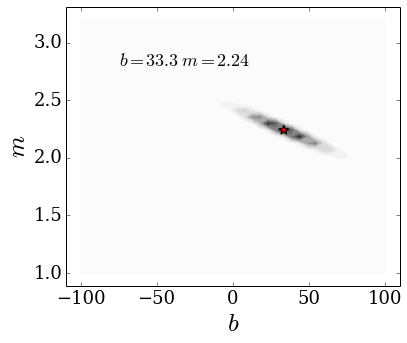

In [96]:
M = linspace(1, 3.2, 40)
B = linspace(-100, 100, 40)
contourf(B, M, ML_test, 15, cmap=cm.Greys)
scatter(b_b, M_b, c='r', marker='*', s=100)
text(-75, 2.8,'$b=33.3\ m=2.24$')
xlabel('$b$', fontsize=25)
ylabel('$m$', fontsize=25)


# 3b

The values of the fits are very similar between 1.a and 3.a but the likelihood is greater
in the case of the 3.a. The fit in 3.a is better because it takes into account the probability that this plots are 'bad' points, and they also take into account the errors in a more precise way.

# 4. Errors on the Parameters

Use the bootstrap method to calculate the uncertainties on the parameters in $3.a$.  You 
can use the bootstrap.m function on the website to carry this out.   

In [197]:
def bootstraping(N_steps):
    b_array = np.zeros(N_steps)
    M_array = np.zeros(N_steps)
    for i in range(N_steps):
        indexes = random.randint(0, 20, 20)
        ML_test, b_b, M_b =ML_errors(40, 11, X[indexes], Y[indexes], sigma_Y[indexes])
        b_array[i] = b_b
        M_array[i] = M_b
    sigma_b = 1/N_steps * sum([(b_array[i]-np.mean(b_array))**2.0 for i in range(N_steps)])
    sigma_M = 1/N_steps * sum([(M_array[i]-np.mean(M_array))**2.0 for i in range(N_steps)])

    return sigma_b**0.5, sigma_M**0.5

In [212]:
sigma_b, sigma_m = bootstraping(10)

In [214]:
print(sigma_b, sigma_m)

25.1020271806 0.158049418449


Using the bootstraping method I get the following values for $\sigma_b$ and $\sigma_m$

$\sigma_b = 25.10$

$\sigma_m = 0.15$